<div dir="rtl" class="alert alert-block alert-info"> <font size="5" face="HM XNiloofar"> 
<b> یادگیری تقویتی: تمرین شبیه‌سازی سوم 
</b>
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br>
توجه۱: مدل از صفر پیاده و ترین شده است و از مدل های ذکر شده در گروه استفاده نشده است. برای استفاده از مدل ابتدا سلولی که مدل در آن تعریف شده اجرا و در ادامه مدل نهایی لود شود. اگر مدل دیگری تعریف شود با توجه به تفاوت در تعریف مدل ممکن است در لود مدل با خطا مواجه شوید.
<br>
<br>
توجه۲: پیاده سازی با استفاده از stable_baselines3 انجام شده است.
<br>
<br /> 
</b>



فقط قسمت‌های <code>TODO</code> را پر کنید و  Jupyter Notebook تکمیل شده را به فرمت <code>ipynb</code> و <code>html</code> به عنوان گزارش خود در CW آپلود کنید. <br />
در این تمرین شما در بازی معروف Breakout در Atari الگوریتم‌ DQN + Experience Replay + Target Network  را پیاده‌سازی می‌کنید. <br />
<br />
توجه داشته باشید که آموزش Agent در این بازی حداقل ۱۰ ساعت زمان می‌برد. پس از الان شروع کنید!
<br />
کدهای این Notebook در محیط 
   <a href="https://colab.research.google.com/">Google Colab</a>
    بدون نصب کتاب‌خانه‌ای قابل اجراست.
    <br />
    در این تمرین برای آموزش شبکه‌های عصبی از کتاب‌خانه‌ی 
    <a href="https://pytorch.org/">Pytorch</a>
    استفاده می‌کنیم (چنانچه با این محیط آشنایی ندارید از 
    <a href="https://pytorch.org/tutorials/">این لینک</a>
    استفاده کنید). 
    <br />
    توصیه می‌شود برای آموزش شبکه‌های عصبی از GPU استفاده کنید.
 </font> </div>

***You can jump directly to these sections:***

+ [A. Introduction](#A.-Introduction)
    + [1. Algorithm](#1.-Algorithm)
    + [2. Game environment](#2.-Game-environment)
    + [3. Q-network architecture](#3.-Q-network-architecture)
    + [4. Deepmind helper functions](#4.-Deepmind-helper-functions)
+ [B. An experience with the environment](#B.-An-experience-with-the-environment)
    + [1. Start game](#1.-Start-game)
    + [2. end-of-life vs end-of-episode](#2.-end-of-life-vs-end-of-episode)
    + [3. Reward](#3.-Reward)
+ [C. Training](#C.-Training)
    + [1. Network](#1.-Network)
    + [2. Hyperparameters](#2.-Hyperparameters)
    + [3. Learning](#3.-Learning)
    + [4. Result](#4.-Result)
+ [Give Us Feedback](#Give-Us-Feedback)
---

<div dir="rtl" style="margin: 20px" class="alert alert-block alert-success"> <font size="4" face="HM XNiloofar"> <b>  
    <a href="https://en.wikipedia.org/wiki/Breakout_(video_game)">Atari Breakout Game:</a> </b>
در این تمرین قرار است شما یک Agent را آموزش دهید که امتیاز خود در بازی را حداکثر کند. محیط با حذف هر خانه‌ی رنگی یک امتیاز به Agent می‌دهد. توجه داشته باشید که Agent فقط اسکرین بازی را مشاهده می‌کند (دقیقا مثل یک انسان که Atari 🎮 بازی می‌کند) و با هیچ کانسپتی آشنا نیست. یعنی نمی‌داند توپ چیست یا این که اکشن‌های بازی دقیقا چه کاری انجام می‌دهند. جالب اینجاست درحالی که انسان با این مفاهیم کاملا آشناست ولی Agent می‌تواند به عملکردی بهتر از انسان دست یابد (
    <a href="https://www.youtube.com/watch?v=V1eYniJ0Rnk">این لینک</a>
    را ببینید).
</font> </div>

---

# A. Introduction

## 1. Algorithm

<div dir="rtl"> <font size="4" face="HM XNiloofar">    
    به یاد بیاورید که در کلاس درس شما با الگوریتم Q-Learning و SARSA در بحث model-free آشنا شدید. سپس الگوریتم SARSA را با روش Approximation فرا گرفتید. الگوریتم DQN ورژن Approximation الگوریتم Q-Learning است. عملکرد این الگوریتم  با دو تکنیک Experience Replay و Target Network به طور قابل ملاحضه‌ای بهبود می‌یابد.
<br />
در تکنیک Experience Replay به جای این که پارامترهای شبکه از روی آخرین ترنزیشن، یعنی چهارتایی 
<div dir="ltr"> <center> <b> <code>transition = [state, action, reward, next_state, done]</code> </b> </center></div> 
 به‌روز شوند، به کمک یک batch تصادفی از ترنزیشن‌های گذشته به‌روز‌رسانی صورت می‌گیرد. ترنزیشن‌های گذشته در یک بافر 
 <i>D</i>
 با سایز محدود ذخیره می‌گردد.
<br />
در تکنیک Target Network مقدار تارگت زوج استیت و اکشن در تابع هزینه از روی شبکه Target یعنی
 Q(.,.;&Theta;')
که پارامتر‌هایی متفاوت از شبکه Learner یعنی 
Q(.,.;&Theta;)
دارد محاسبه می‌شود. پارامترهای شبکه Target به طور متناوب برای k گام بدون تغییر می‌ماند و سپس برابر با پارامتر‌های شبکه Learner   می‌شود؛
&Theta;' = &Theta;.
<br />
تابع هزینه به صورت زیر در می‌آید:
</font> </div> 

$$L(\theta) = \mathbb{E}_{(S_t, A_t, R_{t+1}, S_{t+1})\sim \mathcal{D}} \bigg[\Big(R_{t+1} + \gamma \max_{a' \in \mathcal{A}} Q(S_{t+1},a';\theta') - Q(S_{t},A_t;\theta)\Big)^2\bigg]$$

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    توجه داشته باشید که اگر
   <code>next_state</code> یک استیت نهایی باشد، مقدار تارگت برابر <code>reward</code> خواهد بود.  
    <br />
    <br />
برای پیاده‌سازی الگوریتم اسلاید ۱ الی ۳۷ 
    <a href="http://ce.sharif.edu/courses/98-99/2/ce719-1/resources/root/Slides/Deep%20RL.pdf">این منبع</a>
    را مطالعه کنید. الگوریتمی که در این تمرین پیاده‌سازی می‌کنید در <b>اسلاید ۲۵</b> آورده شده است. 
    پارامترها و ساختار شبکه در این تمرین منطبق بر
    <a href="https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf">DeepMind's Nature paper</a>
    است.
    <br />
    برای اطلاعات بیشتر مطالعه‌ی مقاله‌ی زیر توصیه می‌گردد:
</font> </div> 
Volodymyr Mnih, Koray Kavukcuoglu, David Silver, Andrei A Rusu, Joel Veness, Marc G Bellemare, Alex Graves, Martin Riedmiller, Andreas K Fidjeland, Georg Ostrovski, et al. Human-level control through deep reinforcement learning. nature, 518(7540):529–533, 2015. 5



<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <br />
    <br />
پس از مطاله‌ی منابع فوق به سوالات زیر پاسخ دهید:
<br />
۱. تفاوت الگوریتم DQN و SARSA را بیان کنید.
<br />
۲.  مزایای استفاده از Experience Replay چیست؟ افزایش اندازه‌ی بافر چه تاثیر مثبت و منفی بر الگوریتم دارد؟
<br />
۳. مزایای استفاده از Target Network چیست؟ افزایش دوره تناوب به‌روز‌رسانی پارامترهای این شبکه (k) چه تاثیری بر الگوریتم دارد؟
<br />
۴. گرادیان تابع هزینه نسبت به پارامتر‌های شبکه Learner را محاسبه کنید. توجه داشته که گرادیان را نسبت به پارامترهای شبکه Target محاسبه نمی‌کنیم.
</font> </div> 


**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">
<b>
پس از مطاله‌ی منابع فوق به سوالات زیر پاسخ دهید:
<br />
۱. تفاوت الگوریتم DQN و SARSA را بیان کنید. <br>
</b>

سودوکد دو الگریتم را در شکل زیر میبینیم. همان طورکه از سودوکد ها مشخص است، 
در sarsa
انتخاب اکشن از طریق پولیسی(در این جا اپسیلون گریدی) صورت میگیرد و در ادامه ولیو استیت و اکشن با اکشن انتخابی از طریق پولیسی صورت به روزرسانی میشود. بنابراین یک الگوریتم 
on-policy
را شاهد هستیم.
اما در q-learning،
اکشن از طریق پولیسی(اپسیلون گریدی) انتخاب میشود اما در ادامه به روزرسانی ولیو استیت و اکشن با برخلاف حالت قبل با استفاده از اکشنی صورت میگیرد که ولیو استیت بعدی و اکشن بعدی بیشینه شود. در واقع اکشن برای به روزرسانی ولیو به صورت حریصانه انتخاب میشود و با یک الگوریتم 
off-policy 
سر و کار داریم.

الگوریتم sarsa 
به جواب بهینه همگرا نمیشود، اما q-learning
به جواب بهینه همگرا میشود. در واقع رابطه ی q-learning
بر پایه ی رابطه ی بازگشتی Bellman 
است و در نهایت به آن که همان جواب بهینه است همگرا میشود.
الگوریتم sarsa معادل
الگوریتم q-learning است که محیط با احتمال اپسیلون لغزنده است.

<img src="https://i.stack.imgur.com/wmFny.png" width="500">
<br>

<b>
۲.  مزایای استفاده از Experience Replay چیست؟ افزایش اندازه‌ی بافر چه تاثیر مثبت و منفی بر الگوریتم دارد؟
</b>
<br />

در این روش یک بافر با اندازه مشخص تعریف میشود که ترنزکشن های مختلف به آن اضافه میشود. حال در مرحله از به روزرسانی یک بچ از حافظه ی بافر انتخاب و با استفاده از آن ها به روزرسانی انجام میشود.

مزایا:

اول، هر ترنزکشن در تعداد بیشتری از به روزرسانی وزن ها استفاده میشود، که امکان بهره وری بیشتر داده ها را فراهم می کند. دوم، یادگیری با استفاده از نمونه های متوالی، به دلیل همبستگی بالای نمونه ها، کارآمد نیست. تصادفی انتخاب کردن نمونه ها این همبستگی ها را می شکند و بنابراین واریانس به روز رسانی ها را کاهش می دهد. سوم، هنگام یادگیری پولیسی بهینه، پارامترهای فعلی نمونه داده بعدی را تعیین می کنند که پارامترها بر روی آن آموزش داده شده اند. به عنوان مثال، اگر عمل بهینه حرکت به چپ باشد، نمونه‌های آموزشی تعداد داده ی بیشتری از نمونه‌های حرکت به سمت چپ خواهند داشت و بالعکس. بنابراین حلقه های فیدبک ناخواسته ممکن است ایجاد شود و پارامترها ممکن است به نقطه مینیمم محلی حرکت کنند، یا حتی واگرا شوند.


<b>
<br>
۳. مزایای استفاده از Target Network چیست؟ افزایش دوره تناوب به‌روز‌رسانی پارامترهای این شبکه (k) چه تاثیری بر الگوریتم دارد؟
<br />
</b>
<br>

در این روش یک مدل 
target با پارامتر های تتا استار
تعریف میشود که q_target
ما با استفاده از تتا استار محاسبه میشود. پارامتری که قرار است یاد گرفته شود تتا است. پس از هر k بار هم تتا استار به برابر تتا قرار داده میشود.

<br>
مزایا: 
<br>

این اصلاح الگوریتم را در مقایسه با یادگیری آنلاین q-learning پایدارتر می کند. برای مثال در یادگیری آنلاین q-learning اگر با به روزرسانی  Q(st,at) افزایش یابد اغلب Q(st+1,a)  برای همه ی اکشن ها افزایش می یابد و از این رو تارگت نیز افزایش می یابد که منجر به نوسان می شود و یا واگرایی پولیسی میشود. تولید تارگت با استفاده از مجموعه‌ای از پارامترهای قدیمی‌تر، تاخیری را بین زمان به‌روزرسانی Q و زمان به‌روزرسانی تارگت ایجاد میکند که در نهایت احتمال واگرایی پولیسی یا نوسانات را بسیار کاهش میدهد.

اثر افزایش دوره تناوب به روزرسانی شبکه تارگت:

همان طور که در شکل بالا سمت چپ از مقاله Constrained Deep Q-Learning Gradually Approaching Ordinary Q-Learning
میبینید کاهش دوره تناوب موجب واگرا شدن و واریانس بالا خواهد شد. با افزایش دوره تناوب، همگرایی مدل کندتر میشود. زیرا به روزرسانی ها دیرتر اتفاق میفتد و هر تغییر ایجاد شده در مدل لرنر را یاد میگیریم. 

<img src="https://www.researchgate.net/publication/337860304/figure/fig5/AS:834548434747392@1575983260017/Effects-of-the-update-frequency-of-the-target-network-on-the-MNIST-maze-task-A.png" width="700" />

<br>

<b>
۴. گرادیان تابع هزینه نسبت به پارامتر‌های شبکه Learner را محاسبه کنید. توجه داشته که گرادیان را نسبت به پارامترهای شبکه Target محاسبه نمی‌کنیم.
</b>

با توجه به فرمول موجود در مقاله گرادیان را محاسبه کردیم:

</font> </div> 

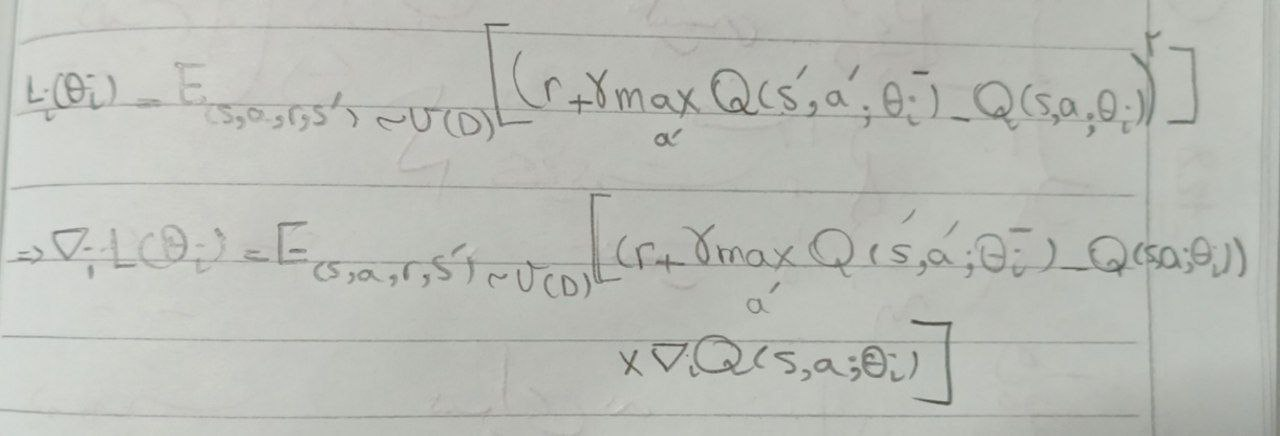

## 2. Game environment

<div dir="rtl"> <font size="4" face="HM XNiloofar">
<a href="https://www.gymlibrary.ml/ ">کتاب خانه Gym</a> 
    یکی از منابع مفید برای استفاده از محیط‌های آماده برای ارزیابی الگوریتم‌های RL است. کد زیر طریق استفاده از یکی از بازی‌های این کتاب‌خانه را نشان می‌دهد: 
</font> </div> 

```python
# libraries
import gym
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/
```

```python
# General Code
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
```
<div dir="rtl"> <font size="4" face="HM XNiloofar">
 با مطالعه‌ی داکیومنت‌های سایت Gym بیان کنید هر خط کد بالا چه کاری انجام می دهد و متغیرهای خروجی در انجام هر اکشن نشان دهنده‌ی چیست؟
 </font> </div> 

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">
<b>
 با مطالعه‌ی داکیومنت‌های سایت Gym بیان کنید هر خط کد بالا چه کاری انجام می دهد و متغیرهای خروجی در انجام هر اکشن نشان دهنده‌ی چیست؟
 </b>
 
 </font> </div> 
 
 ```python
# libraries
import gym
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

در این قسمت ROM های مختلف که بازی آتاری دارد دانلود میشود. یک پوشه درست شده و فایل ROM.rar از حالت فشرده خارج شده و به یک پوشه ی خاص ریخته میشود. در ادامه با صدا زدن تابع atari_py همه ی ROM ها لود شده و gym میتواند از آن ها استفاده کند. البته با توجه به این که از stable_baselines3 استفاده شده است نیازی به کد بالا نیست و ما این قسمت را کامنت کردیم. زیرا محیط های مختلف به صورت پیش فرض لود شده اند.

</font> </div> 

 ```python
# General Code
env = gym.make('CartPole-v0') # یک محیط بازی ایجاد میکند که در این جا کارتپل است
for i_episode in range(20): # میخواهیم ۲۰ اپیزود بازی تولید کنیم
    observation = env.reset() # محیط بازی به شرایط اولیه برگردانده میشود و خروجی آن به عنوان متغیر آبزرویشن ذخیره میشود
    for t in range(100): # میخواهم حداکثر ۱۰۰ حرکت انجام دهیم. دلیل حداکثر وجود بریک در حلقه است
        env.render() # این خط کد استیت فعلی به صورت یک پاپ آپ ویندو نمایش داده میشود. در واقع با این خط میتوانیم بازی را مشاهده کنیم
        print(observation) # چاپ آبزرویشن به صورت آرایه
        action = env.action_space.sample() # از بین اکشن های موجود یکی به صورت تصادفی انتخاب میشود
        observation, reward, done, info = env.step(action) # با اکشن انتخاب شده در خط قبل یک گام انجام میشود و خروجی های تولید شده شامل مشاهده، جایزه، انجام و اطلاعات در متغیرهای نظیرشان ذخیره میشوند.
        if done: # اگر بازی به پایان خود برسد تعداد گام های زمانی فرد در خط بعدی چاپ و با بریک از حلقه خارج میشویم
            print("Episode finished after {} timesteps".format(t+1)) 
            break 
env.close() # در خطوط قبل با رندر محیط بازی را به صورت یک ویندو باز کرده بودیم. با این خط آن ویندو بسته میشود.
```

## 3. Q-network architecture


<div dir="rtl"> <font size="4" face="HM XNiloofar">
 محیط ما در این تمرین بازی Breakout است. در این بازی ۴ اکشن <code>('NOOP', 'FIRE', 'RIGHT', 'LEFT')</code> داریم. با انجام هر اکشن، محیط به ما ۴ متغیر <code>observation, reward, done, info</code> را می دهد. <code>observation</code> اسکرین بازی را نشان می‌دهد که ابعاد <code>(3, 160, 210)</code> دارد که عدد 3 بیانگر RGB بودن صفحه است. (در این تمرین از متغیر  <code>info</code> استفاده نمی‌کنیم). 
<br />
 معماری شبکه‌ی عصبی بازی در 
<a href="http://ce.sharif.edu/courses/98-99/2/ce719-1/resources/root/Slides/Deep%20RL.pdf">اسلاید ۹</a> 
     نشان داده شده است. این ساختاری است که مقاله DQN برای آموزش بازی‌ها از آن استفاده کرده. 
    <br />
    <br />
    حال به سوالات زیر پاسخ دهید:
 <br />   
۱.    
 ساختار تابع Q(s,a;&Theta;) به چه صورت طراحی شده است؟ 
 <br />  
۲. 
    ورودی شبکه‌ی عصبی در این ساختار فقط استیت بازی است درحالی که انتظار داریم زوج استیت و اکشن باشد. نشان دهید ساختار فوق یک تابع معادل دارد که زوج استیت و اکشن را دریافت و value را در خروجی می‌دهد.
 <br />  
۳.    
    استفاده از ساختار پیشنهاد شده در این اسلاید چه مزیتی بر یک ساختار شبکه عصبی دارد که زوج استیت و اکشن را دریافت و با ترکیب آن‌ها به کمک اجرای چند لایه شبکه عصبی value را در خروجی می‌دهد؟ 
 <br />  
۴.    
 ورودی شبکه‌ی عصبی به جای این که اسکرین یک لحظه‌ی بازی باشد، اسکرین ۴ لحظه‌ی متوالی در بازی است. چرا؟ افزایش این عدد چه تاثیری بر عملکرد الگوریتم خواهد داشت؟
 <br />  
۵.
    سایز ورودی شبکه 
    <code>(4, 84, 84)</code>
    و سایز خروجی
    <code>4</code>
    است. این اعداد نشان دهنده‌ی چه هستند؟
 </font> </div> 

**Your answer: ```TODO ```**


<div dir="rtl"> <font size="4" face="HM XNiloofar">
<b>
۱.    
 ساختار تابع Q(s,a;&Theta;) به چه صورت طراحی شده است؟ 
 </b>
<br>

 ساختار این تابع با توجه به مقاله به صورت یک شبکه عصبی با پارامتر یادگیری تتا است که ورودی آن ۴ فریم آخر آخر بازی(بعد از پیش پردازش ها) است که هر فریم بعد ۸۴ در ۸۴ دارد. بنابراین ورودی شبکه سایز 
<code>(4, 84, 84)</code>
را دارد. در ادامه لایه ی مخفی اول یک لایه کانولوشنی با ۳۲ فیلتر ۸ در ۸ و گام (stride)
۴ است که در ادامه تابع 
Relu یا همان max(x,0) به آن اعمال شده است. 
 در ادامه لایه ی مخفی دوم یک لایه کانولوشنی با ۶۴ فیلتر ۴ در ۴ و گام ۲ قرار دارد که به آن Relu اعمال شده است.
 در لایه ی مخفی سوم نیز یک لایه کانولوشنی با ۶۴ فیلتر ۳ در ۳ و گام ۱ که مجددا Relu به آن اعمال  شده است.
 در لایه ی مخفی پایانی یک لایه ی fully-connected که ۵۱۲ نورون دارد و و در ادامه آن Relu داریم.
 در پایان نیز خروجی این لایه به صورت fully-connected 
 به ۴ نرون خروجی (با توجه به این که ۴ اکشن متفاوت داریم) متصل شده است.
 <br /> 
 <b> 
۲.     ورودی شبکه‌ی عصبی در این ساختار فقط استیت بازی است درحالی که انتظار داریم زوج استیت و اکشن باشد. نشان دهید ساختار فوق یک تابع معادل دارد که زوج استیت و اکشن را دریافت و value را در خروجی می‌دهد.
   </b> 
 <br>

در واقع این شبکه استیت بازی را دریافت و در خروجی ولیو استیت و اکشن های مختلف را میدهد که در این شبکه ۴ تاست. یعنی:

s => Q(s,a,theta)

این شبکه معادل این است که در ورودی زوج استیت و اکشن ها را دریافت کنیم و در خروجی ولیو را میدهد.

s,a => Q(s,a,theta)

 <b>
 <br>

۳.        استفاده از ساختار پیشنهاد شده در این اسلاید چه مزیتی بر یک ساختار شبکه عصبی دارد که زوج استیت و اکشن را دریافت و با ترکیب آن‌ها به کمک اجرای چند لایه شبکه عصبی value را در خروجی می‌دهد؟ 
 </b>
<br>

پیاده سازی روش دوم(دریافت زوج استیت و اکشن و خروجی ولیو) چالشی تر است. اول این که باید به گونه ای اکشن و استیت را به گونه ای به شبکه عصبی ورودی دهیم. در حالی که اکشن تنها ۴ نورون و استیت ۴ در ۸۴ در ۸۴ نورون دارد. انتخاب روش ترکیب این دو و دادن آن ها به عنوان ورودی سخت است. دوم این که با توجه به این اکشن که تنها ۴ نورون است به عنوان ورودی وارد شده دیگر نمیتوانیم از لایه های کانولوشن به عنوان لایه های مخفی استفاده کنیم. زیرا این لایه ها برای عکس و ورودی های چند بعدی طراحی شده اند.
از طرفی مزیت روش اول این است در الگوریتم 
q-learning
نیاز داریم بدانیم کدام ولیو استیت و اکشن از همه بهتر است و در واقع یک ماکسیمم گیری داریم. روش اول با هر بار فوروارد استیت همه ی ولیو اکشن ها را تولید میکند و به راحتی میتوانیم بین آن ها ماکسیمم بگیریم. در حالی که در روش دوم باید ۴ بار این اتفاق می افتاد.

<br>
 <b>
۴.     ورودی شبکه‌ی عصبی به جای این که اسکرین یک لحظه‌ی بازی باشد، اسکرین ۴ لحظه‌ی متوالی در بازی است. چرا؟ افزایش این عدد چه تاثیری بر عملکرد الگوریتم خواهد داشت؟
 </b>
 <br>
 
 اسکرین یک لحظه ی بازی اطلاعاتی در مورد حرکت ها در خود ندارد. برای مثال یک اسکرین از بازی break-out
 تنها شامل مکان توپ و راکت است. بنابراین جهت حرکت توپ در یک اسکرین مشخص نیست در حالی که برای انتخاب اکشن به جهت حرکت توپ نیاز داریم. با داشتن اسکرین ۴ لحظه ی متوالی اطلاعات شامل حرکت توپ نیز به دست می آید. افزایش این عدد به دقیق شدن تخمین جهت حرکت کمک میکند. از طرفی این کار ابعاد شبکه را بزرگ میکند که فرآیند یادیگری را کند میکند. از طرف دیگر افزایش این عدد ممکن است در یادگیری مشکل ایجاد کند. زیرا ممکن است تعداد فریم داشته باشیم که جهت حرکت توپ عوض شده است.

 <b>
 <br>

۵.
    سایز ورودی شبکه 
    <code>(4, 84, 84)</code>
    و سایز خروجی
    <code>4</code>
    است. این اعداد نشان دهنده‌ی چه هستند؟
    </b> 
    <br>
    همان طور که در سوال یک توضیح داده شد، ورودی آن ۴ فریم آخر آخر بازی(بعد از پیش پردازش ها) است که هر فریم بعد ۸۴ در ۸۴ دارد. بنابراین ورودی شبکه سایز 
<code>(4, 84, 84)</code>
را دارد. خروجی شبکه عصبی هم با توجه به این که به تعداد ۴ اکشن داریم ۴ است که هر خروجی نظیر ولیو یک زوج استیت و اکشن است.

 </font> </div> 

## 4. Deepmind helper functions

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    در این تمرین ما از دو تابع کمکی که توسط Deepmind آماده شده است استفاده می‌کنیم. source code این دو تابع در ادامه نوشته شده است. آن را مطالعه و سپس به پرسش پاسخ دهید.
 </font> </div> 
 
Deepmind functions (for Atari games)

```python
# to use stable_baselines.common.atari_wrappers
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.2

from stable_baselines.common.atari_wrappers import make_atari, wrap_deepmind
```
```python
# Use the Baseline Atari environment because of Deepmind helper functions
env = make_atari('BreakoutNoFrameskip-v4')
# Warp the frames, grey scale, stake four frame and scale to smaller ratio
env = wrap_deepmind(env, frame_stack=True, scale=True)
```
It preprocesses the environment:

Source: 

https://github.com/openai/baselines/blob/ea25b9e8b234e6ee1bca43083f8f3cf974143998/baselines/common/atari_wrappers.py

functions:

```python
def make_atari(env_id, max_episode_steps=None):
    env = gym.make(env_id)
    assert 'NoFrameskip' in env.spec.id

    # Sample initial states by taking random number of no-ops on reset.
    env = NoopResetEnv(env, noop_max=30)

    # Return only every `skip`-th frame
    # Repeat action (for skip` times), sum reward (in these repeats), and max over last observations.
    env = MaxAndSkipEnv(env, skip=4)

    if max_episode_steps is not None:
        env = TimeLimit(env, max_episode_steps=max_episode_steps)
    return env

def wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    """Configure environment for DeepMind-style Atari.
    """
    if episode_life:

        # Make end-of-life == end-of-episode, but only reset on true game over.
        env = EpisodicLifeEnv(env)

    if 'FIRE' in env.unwrapped.get_action_meanings():

        # Take action on reset for environments that are fixed until firing.
        env = FireResetEnv(env)

    # Warp frames to 84x84 as done in the Nature paper and later work. (and convert to gray scale)
    env = WarpFrame(env)

    if scale:

        # careful! This undoes the memory optimization, use with smaller replay buffers only.
        # code: np.array(observation).astype(np.float32) / 255.0 ----> range [0,1]
        env = ScaledFloatFrame(env)

    if clip_rewards:

        # Bin reward to {+1, 0, -1} by its sign.
        env = ClipRewardEnv(env)

    if frame_stack:

        # Stack k last frames. Returns lazy array, which is much more memory efficient.
        # observation ---> state 
        # All the information we need to choose an action
        # This will allow the agent to take the velocity of things into account from one image.
        # The direction of agent's movement in the previous several frames
        env = FrameStack(env, 4)

    return env
```

Also, you can see the following link (which implements some similar functions):

https://pytorch.org/tutorials/intermediate/mario_rl_tutorial.html#preprocess-environment


<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <br />
    <br />
با مطالعه‌ی کدهای بالا توضیح دهید تابع <code>make_atari</code> چه تفاوتی با <code>gym.make</code> دارد؟ تابع <code>wrap_deepmind</code> چه پیش‌پردازش‌هایی را بر روی محیط انجام می‌دهد؟ 
 </font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">
<b>
با مطالعه‌ی کدهای بالا توضیح دهید تابع <code>make_atari</code> چه تفاوتی با <code>gym.make</code> دارد؟ تابع <code>wrap_deepmind</code> چه پیش‌پردازش‌هایی را بر روی محیط انجام می‌دهد؟ 
</b>
<br>
<code>make_atari</code>:
<br>
همان طور که در توابع بالا میتوان دید، در تابع 
<code>make_atari</code>
ابتدا کد
<code>gym.make</code>
فراخانی شده و در ادامه تعدادی پیش پردازش صورت گرفته است. 
ابتدا با دریافت 
<code>noop_max</code>
از کاربر در قسمت 
<code>env = NoopResetEnv(env, noop_max=30)</code>
یک عدد رندم بین ۱ تا 
<code>noop_max</code>
 انتخاب میشود و به تعداد آن در محیط گام برمیدارد تا
 done برابر ۱ شود
 و درنهایت obs
 را برمیگرداند. در واقع این خط کد initialize
 های لازم را انجام میدهد.
 در ادامه خط 
 <code>env = MaxAndSkipEnv(env, skip=4)</code>
 قرار دارد که از هر ۴ 
 observation
 یکی را به ما میدهد. در واقع در این قسمت downsample انجام میدهیم.
 برای observation های دورریخته شده هم همان اکشن فریم قبلی را تکرار میکند.
 <br>
<code>wrap_deepmind</code>:
<br>
</font> </div> 


```python
    if episode_life:
        env = EpisodicLifeEnv(env)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

در ابتدا اگر flag با نام
<code>episode_life</code>
برابر TRUE
باشد، در هر باری که جان از ایجیت ما کم بشود خروجی 
done برابر
TRUE خواهد شد 
و وارد استیت درست بعدی(با یک جان کمتر) خواهد شد.
در واقع با این کار طول اپیزود ها کمتر میشود. در ادامه کد:

</font> </div> 


```python
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
```
<div dir="rtl"> <font size="4" face="HM XNiloofar">

را داریم که اگر نیاز به انجام اکشن فایر باشد تا بازی از حالت ثابت بودن در بیاید این اکشن را انجام خواهد داد.

</font> </div> 


```python
    env = WarpFrame(env)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

در ادامه فریم ها را به ابعاد ۸۴ در ۸۴ میبرد تا به ابعاد مورد نیاز برای ورودی شبکه رسیده باشد و در ادامه از حالت RGB به
gray scale تبدیل میشود.

</font> </div> 

```python
    if scale:
        env = ScaledFloatFrame(env)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

در صورت که flag
با مقدار scale
برابر TRUE باشد
،
observation ها
به float32 تبدیل شده 
و در نهایت به ۲۵۵.۰ تقسیم میشند.
در واقع به بازه ی ۰ و ۱ انتقال می یابند.
این کار بهینه سازی های حافظه را خنثی میکند و برای replay buffer های کوچک پیشنهاد میشود.
</font> </div> 


```python
    if clip_rewards:
        env = ClipRewardEnv(env)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

ریوارد ها با توجه به علامتشان به مقادیر یک، منفی یک و صفر نظیر میشوند.

</font> </div> 

```python
    if frame_stack:
        env = FrameStack(env, 4)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

۴ فریم آخر 
را به هم میچسپاند و به صورت 
memory efficient
برمیگرداند.
در واقع خروجی این تابع استیت های ما است.

</font> </div> 

---

# B. An experience with the environment

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
    در این قسمت می‌خواهیم با محیط بازی و توابع آن آشنا شویم.
</font> </div>

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell های زیر به منظور آشنایی شما با محیط بازی نوشته شده‌اند. آن‌ها را اجرا کنید.
</font> </div>

### libraries

In [ ]:
# libraries
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time
import itertools

In [ ]:
# libraries

# to use stable_baselines.common.atari_wrappers
# ! pip uninstall tensorflow
# ! pip install tensorflow==1.13.2

# %tensorflow_version 1.x
# !pip install stable-baselines[mpi]==2.10.2
!pip install stable-baselines3[extra] ale-py==0.7.4

# from stable_baselines.common.atari_wrappers import make_atari, wrap_deepmind
from stable_baselines3.common.env_util import make_atari_env as make_atari
from stable_baselines3.common.atari_wrappers import AtariWrapper, NoopResetEnv, EpisodicLifeEnv, FireResetEnv, WarpFrame, ClipRewardEnv, MaxAndSkipEnv
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecFrameStack, VecNormalize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 6.4 MB/s 
     |████████████████████████████████| 1.6 MB 50.8 MB/s 
     |████████████████████████████████| 1.5 MB 35.0 MB/s 
     |████████████████████████████████| 1.1 MB 62.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616827 sha256=44825148d8c07fca070a1ab67a1d8cbb09e7849c4b2d4d6057b7472333ad4c82
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=9a4a325ca951eae8c5a17f9cf33792dd80532918a26d3663f2202dd6dfd0cdd4
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c40

In [ ]:
import gym
from gym import spaces
from collections import deque

class ScaledFloatFrame(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)
        self.observation_space = spaces.Box(low=0, high=1.0, shape=env.observation_space.shape, dtype=np.float32)

    def observation(self, observation):
        return np.array(observation).astype(np.float32) / 255.0

class LazyFrames(object):
    def __init__(self, frames):
        """
        This object ensures that common frames between the observations are only stored once.
        It exists purely to optimize memory usage which can be huge for DQN's 1M frames replay
        buffers.
        This object should only be converted to np.ndarray before being passed to the model.
        :param frames: ([int] or [float]) environment frames
        """
        self._frames = frames
        self._out = None

    def _force(self):
        if self._out is None:
            self._out = np.concatenate(self._frames, axis=2)
            self._frames = None
        return self._out

    def __array__(self, dtype=None):
        out = self._force()
        if dtype is not None:
            out = out.astype(dtype)
        return out

    def __len__(self):
        return len(self._force())

    def __getitem__(self, i):
        return self._force()[i]


class FrameStack(gym.Wrapper):
    def __init__(self, env, n_frames):
        gym.Wrapper.__init__(self, env)
        self.n_frames = n_frames
        self.frames = deque([], maxlen=n_frames)
        shp = env.observation_space.shape
        self.observation_space = spaces.Box(low=0, high=255, shape=(shp[0], shp[1], shp[2] * n_frames),
                                            dtype=env.observation_space.dtype)

    def reset(self, **kwargs):
        obs = self.env.reset(**kwargs)
        for _ in range(self.n_frames):
            self.frames.append(obs)
        return self._get_ob()

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        assert len(self.frames) == self.n_frames
        return LazyFrames(list(self.frames))

In [ ]:
def make_atari(env_id, max_episode_steps=None):
    env = gym.make(env_id)
    assert 'NoFrameskip' in env.spec.id
    env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)

    if max_episode_steps is not None:
        env = TimeLimit(env, max_episode_steps=max_episode_steps)
    return env        

def wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    if episode_life:
        env = EpisodicLifeEnv(env)

    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)

    env = WarpFrame(env)

    if scale:
        env = ScaledFloatFrame(env)

    if clip_rewards:
        env = ClipRewardEnv(env)

    if frame_stack:
        env = FrameStack(env, 4)

    return env

### Gif function

In [ ]:
# visualize game by gif

from matplotlib import animation

def save_frames_as_gif(frames, filename=None):
    """
    Save a list of frames as a gif
    """
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    if filename:
        anim.save(filename, dpi=72, writer='pillow')

## 1. Start game

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در زیر به سه روش شروع به بازی در محیط می‌کنیم. به خروجی‌های Cell ها و gif های خروجی توجه کنید و مختصر درباره عملکرد سه روش توضیح دهید. 
</font> </div>

### Original function

Using `env = gym.make("BreakoutNoFrameskip-v4")`

uint8 (210, 160, 3)
Discrete(4)


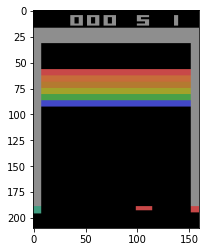

In [ ]:
env = gym.make("BreakoutNoFrameskip-v4")

observation = env.reset()

print(observation.dtype, observation.shape)
plt.imshow(observation)
print(env.action_space)

Episode finished after 496 timesteps
0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

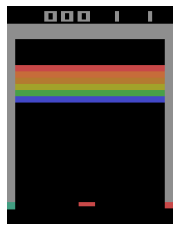

In [ ]:
frames = []
rewards = []

for i_episode in range(1):
    observation = env.reset()
    frames.append(observation)
    for t in range(100000):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        frames.append(observation)
        rewards.append(reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

save_frames_as_gif(frames, filename='randompolicy1.gif')
print(sum(rewards), rewards)

### Deepmind function

Using `env = make_atari("BreakoutNoFrameskip-v4")`

uint8 (210, 160, 3)
Discrete(4)


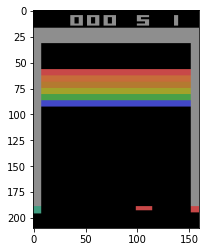

In [ ]:
# Use the Baseline Atari environment because of Deepmind helper functions
env = make_atari("BreakoutNoFrameskip-v4")

observation = env.reset()

print(observation.dtype, observation.shape)
plt.imshow(observation)
print(env.action_space)

Episode finished after 181 timesteps
1.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


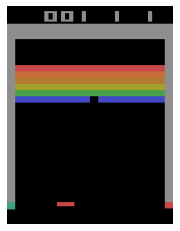

In [ ]:
frames = []
rewards = []

for i_episode in range(1):
    observation = env.reset()
    frames.append(observation)
    for t in range(100000):
        # env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        frames.append(observation)
        rewards.append(reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

save_frames_as_gif(frames, filename='randompolicy2.gif')
print(sum(rewards), rewards)

### Deepmind function + preprocessing

Using `env = make_atari("BreakoutNoFrameskip-v4")` and `env = wrap_deepmind(env, frame_stack=True, scale=True)`

float32 (84, 84, 4)
Discrete(4)


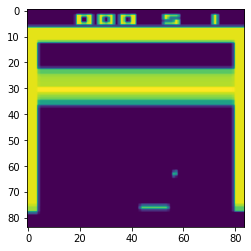

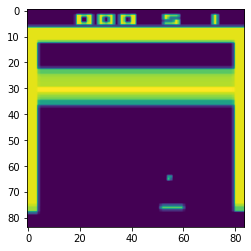

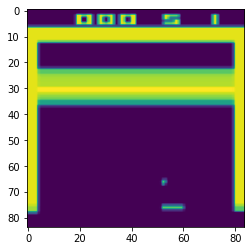

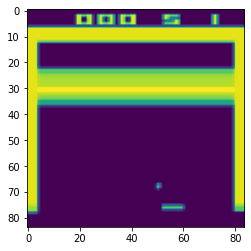

In [ ]:
# Use the Baseline Atari environment because of Deepmind helper functions
env = make_atari("BreakoutNoFrameskip-v4")

# Warp the frames, grey scale, stake four frame and scale to smaller ratio
env = wrap_deepmind(env, frame_stack=True, scale=True)

observation = env.reset()
for i in range(10):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
observation = np.array(observation)

print(observation.dtype, observation.shape)
plt.figure()
plt.imshow(observation[:,:,0])
plt.figure()
plt.imshow(observation[:,:,1])
plt.figure()
plt.imshow(observation[:,:,2])
plt.figure()
plt.imshow(observation[:,:,3])
print(env.action_space)

Episode finished after 10 timesteps
0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


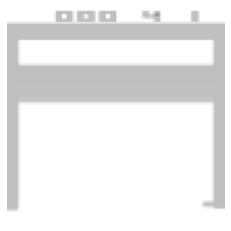

In [ ]:
frames = []
rewards = []

for i_episode in range(1):
    observation = env.reset()
    observation = np.array(observation)
    frames.append(observation)
    for t in range(100000):
        # env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        observation = np.array(observation)
        frames.append(observation)
        rewards.append(reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

save_frames_as_gif(frames, filename='randompolicy3.gif')
print(sum(rewards), rewards)

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar">
    <br />
    <br />
<b>
به خروجی‌های Cell ها و gif های خروجی توجه کنید و مختصر درباره عملکرد سه روش توضیح دهید.
</b>
<br>
در روش اول یعنی gym.make
سرعت ایتریشن ها کمتر است. در روش دوم یعنی make_atari سرعت ایتریشن ها بیشتر خواهد بود. زیرا با توجه به توضیحات داده شده در قسمت قبل از هر ۴ فریم ۳ تا را اسکیپ میکند و در نهایت سرعت بیشتری خواهد داشت.
در روش سوم علاوه بر تابع make_atari تابع wrap_deepmind نیز فراخوانی شده است که این کار علاوه بر اسکیپ کردن ۳ فریم از ۴ فریم، شاهد این هستیم که فریم ها سیاه و سفید شده اند، تعداد پیکسل ها کمتر شده اند و به مقدار ۸۴ در ۸۴ رسیده اند و در نهایت با باختن رسیدن جان ایجنت از ۵ به ۴ بازی قطع میشود. زیرا episode_life
برابر TRUE است و در صورت باخت
done نیز برابر TRUE خواهد بود. اما در روش اول و دوم از ۵ تا ۱ جان ایجنت کم میشود و در نهایت done برابر TRUE میشود.

</font> </div> 

## 2. end-of-life vs end-of-episode

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
تابع <code>EpisodicLifeEnv</code> در تابع <code>wrap_deepmind</code> باعث چه تغییراتی در محیط شده؟ 
</font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<b>
تابع <code>EpisodicLifeEnv</code> در تابع <code>wrap_deepmind</code> باعث چه تغییراتی در محیط شده؟ 
</b>
<br>
<code>wrap_deepmind</code>:

</font> </div>

```python
    if episode_life:
        env = EpisodicLifeEnv(env)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar">

همان طور که در سوالات قبل نیز پاسخ دادیم اگر flag با نام
<code>episode_life</code>
برابر TRUE
باشد، در هر باری که جان از ایجیت ما کم بشود خروجی 
done برابر
TRUE خواهد شد 
و وارد استیت درست بعدی(با یک جان کمتر) خواهد شد.
در واقع با این کار طول اپیزود ها کمتر میشود.
</font> </div> 


## 3. Reward

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
چه زمانی محیط به Agent ریوارد می‌دهد؟ 
</font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<b>
چه زمانی محیط به Agent ریوارد می‌دهد؟
</b>
<br>

با خراب کردن هر خانه مقدار امتیاز داریم. البته در کد ما ریوارد به صورت clipped است. زیرا همان طور که در قسمت های قبل توضیح دادیم ریوارد تابع علامتش خواهد بود و یکی از مقادیر یک، منفی یک یا صفر را خواهد داشت. پس زمانی که خانه ای خراب شود ریوارد مثبت یک را داریم.
</font> </div>

---

# C. Training

## Mount - Libraries - Functions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision
import torch.backends.cudnn as cudnn

import os
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time
import itertools

In [ ]:
# save and load
save_path = F'/content/drive/MyDrive/DQN'
os.makedirs(save_path, exist_ok=True)

# save function
def mysave(state, name):
  # from google.colab import drive
  # drive.mount('/content/drive')
  path = os.path.join(save_path, name+'.pth')
  print('Saving..')
  torch.save(state, path)

# test
# save
mysave(state='no', name='Test01')
# load
state = torch.load('/content/drive/MyDrive/DQN/Test01.pth')
print(state)

Saving..
no


In [ ]:
# check device (USE CUDA!)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('Your system: ' + str(device))

Your system: cuda


## 1. Network

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
Cell زیر مربوط به پیاده‌سازی معماری شبکه‌ عصبی (۳ لایه Convolutional و ۲ لایه Fully Connected) است. آن را منطبق بر معماری شبکه‌ی عصبی در 
<a href="https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf">DeepMind's Nature paper</a>
    تکمیل کنید (معماری مدل در بخش Methods section یافت می‌شود).
<br /> 
 سپس Cell مربوط به ساخت مدل‌های شبکه Target و Learner را اجرا کنید.
توضیح دهید هر خط این Cell  چه کاری انجام می‌دهد. رابطه ریاضی <code>nn.SmoothL1Loss</code> را بنویسید و مزیت استفاده از آن به جای mean squared error را ذکر کنید.  
</font> </div>

In [ ]:
class Network(nn.Module):
    
    def __init__(self, num_actions):
        super(Network, self).__init__()
        
        # TODO
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(3136, 512),
            nn.ReLU(),
            nn.Linear(512, num_actions),
        )        
        

    def forward(self, x):
        
        # TODO
        out = self.net(x)
        
        return out

In [ ]:
action_space = [0, 1, 2, 3] # ['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [ ]:
# build model_learner
print('==> Building learner model..')
model_learner = Network(len(action_space)).to(device)
if device.type == 'cuda':
    model_learner = torch.nn.DataParallel(model_learner)
    cudnn.benchmark = True

# build model_target
print('==> Building target model..')
model_target = Network(len(action_space)).to(device)
if device.type == 'cuda':
    model_target = torch.nn.DataParallel(model_target)
    cudnn.benchmark = True

# model_target parameters are frozen.
for p in model_target.parameters():
    p.requires_grad = False

# update model_target
model_target.load_state_dict(model_learner.state_dict())

# loss function
criterion = nn.SmoothL1Loss().to(device)

==> Building learner model..
==> Building target model..


**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 
<b>

 Cell مربوط به ساخت مدل‌های شبکه Target و Learner را اجرا کنید.
توضیح دهید هر خط این Cell  چه کاری انجام می‌دهد. رابطه ریاضی <code>nn.SmoothL1Loss</code> را بنویسید و مزیت استفاده از آن به جای mean squared error را ذکر کنید.  
</b>
<br>
هر خط سلول مدنظر:

</font> </div>

```python
model_learner = Network(len(action_space)).to(device)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

ابتدا <code>model_learner</code> تعریف میشود. به این صورت که این مدل همان شبکه ی عصبی ای است که پیشتر تعریف کردیم. ورودی این شبکه تعداد اکشن های بازی است که در این بازی ۴ است. در ادامه با دستور 
<code>to(device).</code> 
یک کپی از مدل به device که در این جا
cuda(GPU) است منتقل میشود.(درصورتی که از GPU استفاده نشود CPU خواهد بود.)

</font> </div>

```python
    if device.type == 'cuda':
        model_learner = torch.nn.DataParallel(model_learner)
        cudnn.benchmark = True
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 


 Pytorch به طور پیش فرض تنها از یک GPU استفاده می کند. با اجرای موازی مدل خود با استفاده از  <code>DataParallel</code> می توانید به راحتی عملیات خود را بر روی چندین GPU اجرا کنید که این کار در خط دوم کد بالا انجام میشود.
 یعنی بعد از چک کردن این که device کودا است یا خیر.
 در ادامه flag مربوط به
 <code>cudnn.benchmark</code>
فعال شده است.
این flag به ما امکان می دهد تنظیم خودکار cudnn داخلی را فعال کنیم تا بهترین الگوریتم مورد استفاده برای سخت افزار خود را پیدا کنیم.

در ادامه همین کار را برای model_taget انجام داده ایم. یعنی مدل مشابه حالت قبل تولید شده و برای کار بر روی GPU آماده سازی شده است.

</font> </div>

```python
# model_target parameters are frozen.
for p in model_target.parameters():
    p.requires_grad = False
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

در این قسمت تمامی پارامترهای model_target 
فریز شده است. به این معنی که هنگام حساب کردن مشتق در loss مشتق q تارگت محاسبه نمیشود و به صورت یک عدد با q تارگت برخورد میشود.
عملا این مدل با دستور 
<code>()loss.backward</code>
تغییری نمیکند و تغییرات وزن ها روی model_learner اتفاق میفتد.

</font> </div>

```python
# update model_target
model_target.load_state_dict(model_learner.state_dict())
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

یک state_dict یک دیکشنری پایتون است که هر لایه را به تانسور پارامتر خود نگاشت می کند. برای مثال لایه‌هایی با پارامترهای قابل یادگیری (لایه‌های کانولوشن، لایه‌های خطی و غیره)  state_dict متناظر دارند.

ابتدا با دستور 
()model_learner.state_dict
مدل learner را استخراج میکنیم و وزن های آن را در مدل
target خود 
با دستور
(...)model_target.load_state_dict
لود میکنیم.

</font> </div>

```python
# loss function
criterion = nn.SmoothL1Loss().to(device)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

در این قسمت نیز تابع loss تعریف یک کپی از آن به
device که در این جا کودا است منتقل میشود.
در ادامه در مورد تابع loss بیشتر صحبت خواهیم کرد.

</font> </div>

---

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

رابطه ریاضی <code>nn.SmoothL1Loss</code>:


</font> </div>

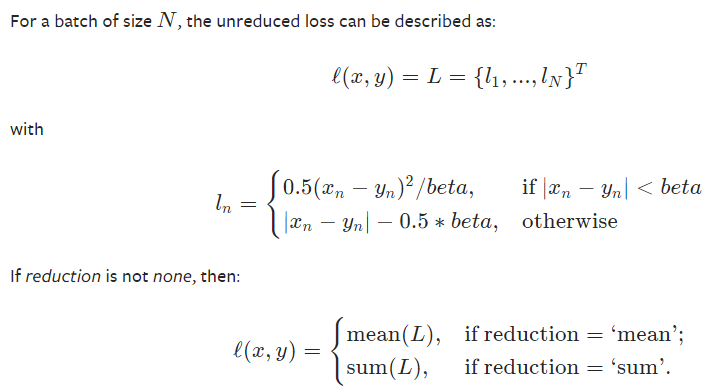

```python
CLASS torch.nn.SmoothL1Loss(size_average=None, reduce=None, reduction='mean', beta=1.0)
```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

همان طور که مشخص است برای یک بچ n 
تایی، میانگین(با توجه به این که پارامتر reduction تعیین نشده
همان حالت پیشفرض یعنی میانگین مدنظر خواهد بود) 
loss هر عضو نظیر در دو مجموعه ورودی تابع محاسبه میشوند.
در صورتی که فاصله ی دو عضو از بتا(در این جا ۱.۰) کمتر باشد loss
با تابع توان دو محاسبه خواهد شد. در حالی که اگر این فاصله از بتا بیشتر باشد loss 
از تابع mean absolute error به دست می آید که این تفاوت این تابع با تابع mean squared error 
است.
این که در فواصل بیش از یک شاهد تابع خطی(در برابر درجه دو) هستیم باعث جلوگیری از exploding gradients
میشود. به این معنی که با توجه به این که نسبت به تابع loss
مشتق میگیریم در فواصل بالا تابع درجه دو و به تبع آن مشتقش زیاد شده و شاهد گرادیان زیادی خواهیم بود که موجب تغییر زیاد و شاید ناخواسته در وزن های ما شود. در تابع loss مورد استفاده ما در فواصل زیاد تابع خطیست و از این مورد جلوگیری میشود. از طرف دیگر این تابع اگر 
Q ها نویزی باشند،
در مرز ها مدل را رباست میکند. 

</font> </div>

## 2. Hyperparameters

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
پارامترهای پیشنهادی زیر (تا حد خوبی) منطبق بر 
<a href="https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf">DeepMind's Nature paper</a>
انتخاب شده‌اند (جدول مربوطه در مقاله را ببینید). هر یک از پارامترها چه چیزی را نشان می‌دهد؟
</font> </div>

In [ ]:
# Use the Baseline Atari environment because of Deepmind helper functions
env = make_atari("BreakoutNoFrameskip-v4")

# Warp the frames, grey scale, stake four frame and scale to smaller ratio
env = wrap_deepmind(env, frame_stack=True, scale=True)

# for the loops
max_num_episode = 1000000
max_step_per_episode = 10000

# i_episode
i_episode = 0

# i_step
i_step = 0

# How often to update model_target (in steps)
update_model_target = 5000 # or 10000

# How often to train model_learner (in steps)
train_model_learner = 4

# epsilon parameters
eps = 1.0
eps_max = 1.0
eps_min = 0.1
eps_num_random_action = 50000 #(in steps)
eps_num_explor_exploit = 1000000.0 #(in steps)
eps_interval = (eps_max - eps_min) / eps_num_explor_exploit

# memory
# memory size: Deepmind paper suggests 1000000; however, this causes memory issues
# If we don't save the tensors in device, we can set it to 200000; otherwise, it can be 100000 - 150000.
memory = []
memory_size = 150000
batch_size = 32
factor_train_batch_size = 400

# discount factor
gamma = 0.99

# learning rate
lr = 0.00001 # 0.00025 # or decrease it from 1e-3 to 1e-4 gradually. At episode 34000 change to 0.0001. Then, at episode 48000 change to 0.00001

# optimizer
optimizer = torch.optim.Adam(model_learner.parameters(), lr=lr)

# reset track
track = {}
track['reward_sum'] = [-1.0]
track['num_step'] = [-1.0]
track['eps'] = [1.0]
track['i_episode'] = [0]
track['i_step'] = [0]

# save
state_save = {'model_learner':model_learner.state_dict(), 'model_target':model_target.state_dict(), 'track':track}
mysave(state=state_save, name='RL_DQN_'+str(i_episode))

Saving..


**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<b>
پارامترهای پیشنهادی زیر (تا حد خوبی) منطبق بر 
<a href="https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf">DeepMind's Nature paper</a>
انتخاب شده‌اند (جدول مربوطه در مقاله را ببینید). هر یک از پارامترها چه 
چیزی را نشان می‌دهد؟
</b>
</font> </div>

```python
max_num_episode = 1000000 # حداکثر تعداد اپیزود طی شده
max_step_per_episode = 10000 # حداکثر گام طی شده در هر اپیزود

i_episode = 0 # در ابتدای هر اپیزود یکی افزایش میابد و برای مقایسه با حداکثر تعداد اپیزود طی شده استفاده میشود

i_step = 0 # شمارش تمامی گام های طی شده در طول یادگیری

update_model_target = 5000 # بعد از هر ۵۰۰۰ گام مدل تارگت با وزن های مدل لرنر به روزرسانی میشود.

train_model_learner = 4 # بعد از هر چند گام مدل لرنر به روزرسانی شود. البته به روزرسانی در صورتی انجام میشود که طول مموری از حد خاصی(در ادامه توضیح داده میشود) بیشتر باشد.

# epsilon parameters
eps = 1.0 # اپسیلونی که برای الگوریتم اپسیلون گریدی استفاده میشود در طول یادگیری تغییرمیکند.
eps_max = 1.0 # بیشینه مقدار اپسیلون. در این حالت کاملا در حال اکسپلور هستیم
eps_min = 0.1 # کمترین مقدار اپسیلون. در این حالت با احتمال ۰.۹ اکشن بهینه و با احتمال ۰.۱ یکی از همه ی اکشن ها را به صورت رندم انتخاب میکنیم.
eps_num_random_action = 50000 #(in steps) # در ۵۰۰۰۰ گام اول اپسیلون برابر اپسیلون بیشینه است و بنابراین شاهد اکسپلور هستیم
eps_num_explor_exploit = 1000000.0 #(in steps) # در یک میلیون گام بعدی به صورت خطی اپسیلون را تا اپسیلون کمینه کاهش میدهیم.
eps_interval = (eps_max - eps_min) / eps_num_explor_exploit # این عدد همان شیب خطی است که از اپسیلون بیشینه به سمت کمینه حرکت میکنیم. یعنی در هر گام این مقدار از اپسلیون کم میشود تا به اپسیلون کمینه برسد

# memory
memory = [] # تعریف حافظه. ترنزکشن ها شامل استیت، اکشن، ریوارد، استیت بعدی و انجام به این لیست اضافه میشود
memory_size = 150000 # حداکثر تعداد ترنزکشن ها. به این صورت که اگر طول لیست از این مقدار بیشتر شود، ترنزکشن اول حذف خواهد شد
batch_size = 32 # سایز بچ. برای یادگیری مدل در هر مرحله یک بچ که در این جا ۳۲ تاست از ترنزکشن های موجود در مموری به صورت رندم انتخاب و با استفاده از آن ها یادگیری صورت میگیرد.
factor_train_batch_size = 400 # تا زمانی که طول مموری از ضرب این پارامتر و سایز بچ(در این جا ۳۲*۴۰۰=۱۲۸۰۰) کمتر باشد، فرآیند یادگیری آغاز نمیشود. بنابراین بعد از این که تعداد خوبی ترنزکشن در مموری ذخیره شد فرآیند یادگیری را آغاز میکنیم.

gamma = 0.99 # همان ضریب گاما در فرمول به روزسانی ولیو تارگت است

lr = 0.00025 # برای به روزرسانی وزن های شبکه ی عمیق از این پارامتر در تابع بهینه ساز استفاده میشود که وزن ها با این ضریب آپدیت میشوند.

```

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<br /> 

</font> </div>

## 3. Learning

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
در زیر دو cell مشاهده می‌کنید. یکی برای لود کردن یک مدل train شده از درایو شما و یکی برای پیاده‌سازی الگوریتم. 
<br />    
    Cell مربوط به الگوریتم را تکمیل و اجرا کنید. قسمت‌های مختلف کد این الگوریتم را توضیح دهید. چه تکنیک‌هایی برای پیاده‌سازی کارامد بافر استفاده شده است؟
<br />
<br />
زمانی فرایند training را متوقف کنید که Agent عملکرد خوبی داشته باشد (معیار ما در بخش Result در ادامه تمرین ذکر شده است).    
<br />    
    در کد مربوط به الگوریتم، هر ۵۰۰ episode یک بار مدل شبکه‌ها و متغیر <code>track</code> در درایو شما ذخیره می‌گردد. چنانچه به هر دلیلی فراید training متوقف شد و خواستید مجددا آن را شروع کنید، کافیست نام آخرین فایل ذخیره شده در درایو خود را در cell زیر وارد کنید و مجدد فرایند training را شروع کنید.
</font> </div>

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
<b>
Cell مربوط به الگوریتم را تکمیل و اجرا کنید. قسمت‌های مختلف کد این الگوریتم را توضیح دهید. چه تکنیک‌هایی برای پیاده‌سازی کارامد بافر استفاده شده است؟
</b>
<br>

برای این کار اعضای هر ترنزکشن، شامل استیت، اکشن، ریوارد، استیت بعدی و done را هر کدام به صورت یک فرمت خاص ذخیره کرده و در نهایت به مموری اضافه میکنیم. برای مثال state و next_state
 از فرمت float به فرمت uint8 تبدیل میشوند که حجم کمتری اشغال کند. اکشن و ریوارد و done با توجه به این که عدد int هستند نیاز به تغییر ندارد. 
توجه شود که همه ی موارد قبل باید با استفاده از .to(device) 
به device که در این جا GPU است منتقل شود. خوبی این کار این است سرعت کار با توجه این که فرآیند یادگیری نیازمند استفاده از GPU برای پردازش با سرعت بیشتر است، با این کار دوباره نیازمند انتقال از CPU به GPU نیستیم و سرعت ما افزایش می یابد. اما از طرف دیگر سایز بافر با توجه به کمتر بودن رم GPU کمتر میشود. نکاتی که گفته شد از خط ۸ و خطوط ۴۷ تا ۵۰ برداشت میشود.

</font> </div>

In [ ]:
# the 5 most-recently modified files
!ls drive/MyDrive/DQN -t -all -h | head -5

total 1.7G
-rw------- 1 root root 13M Aug 19 10:39 RL_DQN_0.pth
-rw------- 1 root root 431 Aug 19 10:39 Test01.pth
-rw------- 1 root root 18M Aug 19 10:19 RL_DQN_67500.pth
-rw------- 1 root root 18M Aug 18 20:08 RL_DQN_67000.pth


In [ ]:
# loading
state = torch.load('/content/drive/MyDrive/DQN/RL_DQN_67500.pth')
track = state['track']
model_learner.load_state_dict(state['model_learner'])
model_target.load_state_dict(state['model_target'])
eps = track['eps'][-1]
i_episode = track['i_episode'][-1]
i_step = track['i_step'][-1]

print(eps, i_episode, i_step)

0.1 67500 14281037


In [ ]:
# main loop

while i_episode <= max_num_episode:
    i_episode += 1

    # init
    state = env.reset()
    state = torch.tensor(np.transpose((np.array(state) * 255), (2, 0, 1)), dtype=torch.uint8).to(device)
    reward_sum = 0.0

    for t in range(max_step_per_episode):
        i_step += 1

        # ----------------------------------------------------------------------------
        # choose action 
        # ----------------------------------------------------------------------------
        # update epsilon
        # TODO
        if i_step < eps_num_random_action:
            eps = eps_max
        elif i_step < (eps_num_random_action + eps_num_explor_exploit):
            eps = eps - eps_interval
        else:
            eps = eps_min   

        # epsilon greedy
        if np.random.rand() <= eps:
            action = np.random.choice(action_space) # TODO
        else:
            model_learner.eval()
            with torch.no_grad():
              x = state.to(torch.float32).unsqueeze(0) / 255.0
              outputs = model_learner(x)
            action = np.argmax(outputs.cpu()) # TODO  argmax
        
        # ----------------------------------------------------------------------------
        # do the step 
        # ----------------------------------------------------------------------------
        next_state, reward, done, info = env.step(action)
        reward_sum += reward
        if done: reward = -1

        # ----------------------------------------------------------------------------
        # store transition in memory (or buffer) with efficiency 
        # ----------------------------------------------------------------------------
        state = state
        action = torch.tensor(action).to(device)
        reward = torch.tensor(reward).to(device)
        next_state = torch.tensor(np.transpose((np.array(next_state) * 255), (2, 0, 1)), dtype=torch.uint8).to(device)
        done =  torch.tensor(done).to(device)
        # transition
        transition = [state, action, reward, next_state, done]
        # add to memory
        memory.append(transition)
        # limit memory size
        if len(memory) > memory_size: del memory[0] 

        # ----------------------------------------------------------------------------
        # go to next_state 
        # ----------------------------------------------------------------------------
        state = next_state

        # ----------------------------------------------------------------------------
        # train model_learner 
        # ----------------------------------------------------------------------------
        if (len(memory) >= batch_size * factor_train_batch_size) and (i_step % train_model_learner == 0):
            # sample from memory a batch of transitions
            batch_transitions = random.sample(memory, batch_size)
            batch_state, batch_action, batch_reward, batch_next_state, batch_done = map(lambda x: torch.stack(x, 0).to(torch.float32), zip(*batch_transitions))
            batch_state, batch_action, batch_reward, batch_next_state, batch_done = batch_state/255.0, batch_action.to(torch.long), batch_reward, batch_next_state/255.0, batch_done
            # train model_learner
            model_learner.train()
            # forward
            #print(batch_state.shape, batch_action.shape, batch_reward.shape, batch_next_state.shape, batch_done.shape)
            q_predict = model_learner(batch_state).gather(1, batch_action.unsqueeze(-1)).flatten() # TODO slides
            #print(q_predict.shape)
            q_target =  batch_reward + torch.mul((gamma * model_target(batch_next_state).max(1).values), 1 - batch_done) # TODO slides
            # loss
            loss = criterion(q_predict, q_target.detach())
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()        
        
        # ----------------------------------------------------------------------------
        # update model_target 
        # ----------------------------------------------------------------------------
        if i_step % update_model_target == 0:
            # TODO
            model_target.load_state_dict(model_learner.state_dict())
            print('model_target updated!')
        
        # ----------------------------------------------------------------------------
        # if done
        # ----------------------------------------------------------------------------          
        if done:
            print(f"Episode [{i_episode}/{max_num_episode}] Step [{i_step}] | reward_sum -> {reward_sum} | num_step -> {t+1} | eps -> {eps}")
            track['reward_sum'].append(reward_sum)
            track['num_step'].append(t+1)
            track['eps'].append(eps)
            track['i_episode'].append(i_episode)
            track['i_step'].append(i_step)

            # save
            if i_episode % 500 == 0:
              state_save = {'model_learner':model_learner.state_dict(), 'model_target':model_target.state_dict(), 'track':track}
              mysave(state=state_save, name='RL_DQN_'+str(i_episode))
                      
            break

state_save = {'model_learner':model_learner.state_dict(), 'model_target':model_target.state_dict(), 'track':track}
mysave(state=state_save, name='RL_DQN_'+str(i_episode))
env.close()

## 4. Result

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
برای کسب نمره‌ی کامل باید 
     به طور متوسط در هر episode بازی ۸ امتیاز کسب کنید (بعنی میانگین ۵۰۰ المنت آخر در <code>track['reward_sum']</code> بیشتر از ۸ باشد). برای این عملکرد حدودا نیاز به اجرای ۵۰۰۰۰ episode دارید. اگر عملکرد agent شما بهتر از این عدد باشد نمره‌ی امتیازی کسب می‌کنید.
<br /> 
<br /> 
در انتهای training، آخرین فایل ذخیره شده در Google Drive را به صورت دسترسی همگانی قرار دهید و cell زیر را کامل کنید تا هر کس بتواند با اجرای cell به پارامترهای train  شده و متغیر <code>track</code> در فایل نهایی دست‌ یابد. 
<br /> 
<br /> 
سپس cell مربوط به ترسیم نتایج را اجرا و خروجی را آنالیز کنید.    
<br />
<br /> 
در انتها cell های مربوط به gif را اجرا و فایل    <code>result.gif</code> را دانلود و در درایو آپلود کرده و لینک دانلود آن را در قسمت مربوطه قرار دهید.    
</font> </div>

### Load from link

In [ ]:
# Set file's access to 'Anyone with the link'. Then paste file's id (available in the public link).

# TODO (e.g., !gdown 10bapl28NnuYANd8baMqGGmmtOfGMWwGx)
# link: https://drive.google.com/file/d/1-8JO0aImhZQbx_juRgsVdCQoyPNX2hmh/view?usp=sharing
!gdown 1-8JO0aImhZQbx_juRgsVdCQoyPNX2hmh

# loading

# TODO (e.g., state = torch.load('/content/RL_DQN_4500.pth'))
# you should run network model cell first!
state = torch.load('/content/RL_DQN_67500.pth')

track = state['track']
model_learner.load_state_dict(state['model_learner'])
model_target.load_state_dict(state['model_target'])
eps = track['eps'][-1]
i_episode = track['i_episode'][-1]
i_step = track['i_step'][-1]

print(eps, i_episode, i_step)

Downloading...
From: https://drive.google.com/uc?id=1-8JO0aImhZQbx_juRgsVdCQoyPNX2hmh
To: /content/RL_DQN_67500.pth
100% 18.6M/18.6M [00:00<00:00, 150MB/s]
0.1 67500 14281037


### Curves

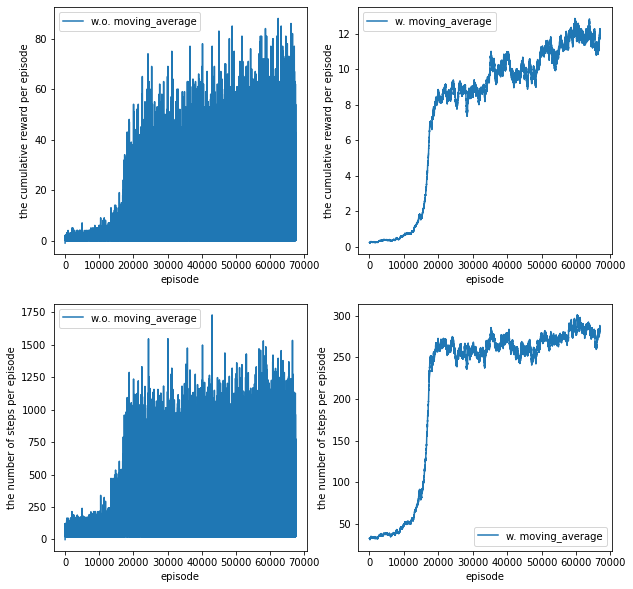

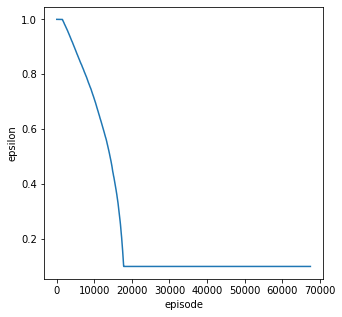

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

fig, ax = plt.subplots(2, 2, figsize=(10,10))
#
ax[0,0].plot(np.arange(len(track['reward_sum'])), track['reward_sum'], label=f"w.o. moving_average")
ax[0,0].set_xlabel('episode')
ax[0,0].set_ylabel('the cumulative reward per episode')
ax[0,0].legend()
#
y = moving_average(track['reward_sum'],500)
ax[0,1].plot(np.arange(len(y)), y, label=f"w. moving_average")
ax[0,1].set_xlabel('episode')
ax[0,1].set_ylabel('the cumulative reward per episode')
ax[0,1].legend()
#
ax[1,0].plot(np.arange(len(track['num_step'])), track['num_step'], label=f"w.o. moving_average")
ax[1,0].set_xlabel('episode')
ax[1,0].set_ylabel('the number of steps per episode')
ax[1,0].legend()
#
y = moving_average(track['num_step'],500)
ax[1,1].plot(np.arange(len(y)), y, label=f"w. moving_average")
ax[1,1].set_xlabel('episode')
ax[1,1].set_ylabel('the number of steps per episode')
ax[1,1].legend()
#
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(np.arange(len(track['eps'])), track['eps'])
ax.set_xlabel('episode')
ax.set_ylabel('epsilon')
plt.show()

**Your answer: ```TODO ```**

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 

<b>

 cell مربوط به ترسیم نتایج را اجرا و خروجی را آنالیز کنید.

</b>
<br>

با توجه به این که از ۴ نمودار اول دو نمودار سمت راست میانگین ۵۰۰ داده آخر داده ها در نمودار سمت چپ هستند، دو نمودار سمت راست را تحلیل میکنیم.در ادامه نمودار بالا سمت راست را نمودار میانگین پاداش و نمودار پایین سمت راست را نمودار میانگین گام نامگذاری میکنیم.
<br>
میانگین پاداش: <br>
همان طور که در کامنت بخش هایپرپارامتر ها ذکر کردیم، بعد از هر تعداد اپیزود لرنینگ ریت را کمتر کردیم تا به نتیجه بهتری حرکت کنیم. توضیح بیشتر آن که تا اپیزود ۳۴۰۰۰ مقدار لرنینگ ریت مقدار 0.00025 بوده که باعث میشود با سرعت بیشتری به سمت مینیمم لاس حرکت کنیم و در نتیجه مقدار ریوارد با سرعت خوبی افزایش می یابد و همان طور که میبینیم حدودا در اپیزود ۲۵۰۰۰ به مقدار ۸ رسیده و بعد از آن حول این مقدار نوسان کرده. بنابراین در اپیزود ۳۴۰۰۰ مقدار نرخ یادگیری را کم کردیم و به مقدار 0.0001 رساندیم که به سمت مینیمم لاس با دقت بیشتری حرکت کنیم. بعد از این کار نتایج بهتر شده و شاهد این هستیم که ریوارد به مقدار ۱۰ رسیده و حول این مقدار نوسان میکند. در ادامه باز هم نرخ یادگیری کمتر شده و در اپیزود ۴۸۰۰۰ به مقدار 0.00001 رسیده و باز هم شاهد بهبود نتایج هستیم که تا اپیزود ۶۷۵۰۰ که یادگیری ادامه داشته مقدار میانگین ریوارد به ۱۲ رسیده و حول این مقدار نوسان میکند. 
<br>
میانگین گام: <br>
 اگر در نمودارهای میانگین گام و میانگین پاداش دقت کنیم، شاهد ارتباط معنادار این دو نمودار خواهیم شد. هر جا مقدار پاداش بیشتر شده در واقع ایجینت تعداد گام بیشتری در بازی بوده و توانسته پاداش بیشتری دریافت کند. همان طور که در نمودار مشاهده میکنیم، درنهایت به مقدار ۲۷۵ در تعداد گام ها رسیده ایم. 
<br>
یکی از دلایل نواسانات زیاد در ۴ نمودار داده شده جدای از نرخ یادگیری که به هر حال موجب تغییر نقطه ی بهینه پیدا شده میشود، استفاده از اپسیلون ۰.۱ است. <br>
<br>
اپسیلون: <br>
شاید در نگاه اول نمودار اشتباه به نظر بیاید، چرا که اپسیلون در گام های میانی به صورت خطی کم میشود. اما با دقت بیشتر در نمودار این نکته را میبینیم که اپسیلون بر حسب اپیزود رسم شده است نه گام. در واقع در اوایل یادگیری، با توجه به این که ایجنت هنوز محیط را یاد نگرفته است، زودتر میبازد و تعداد گام های کمتری را طی میکند. بنابراین طول گام اپیزود ها در ابتدا کم است که این را در نمودار میانگین گام هم میتوان دید. هر چه بیشتر جلو میرویم ایجنت محیط را یاد گرفته و تعداد گام بیشتری را طی میکند و در واقع در هر اپیزود تعداد بیشتر از اپسیلون کم میشود(تعداد گام ضرب در نرخ کاهش اپسیلون) و در نمودار اپسیلون بر حسب اپیزود سرعت کاهش اپسیلون یا همان شیب خط مماس بیشتر میشود که با مشاهدات نمودار مطابقت دارد. در خارج از بازه ی کاهش اپسیلون نیز نکته ی خاصی وجود ندارد و اپسیلون ابتدا مقدار ثابت ۱.۰ و در نهایت مقدار ثابت ۰.۱ را دارد.

</font> </div>

### Gif

In [ ]:
class TimeLimit(gym.Wrapper):
    def __init__(self, env, max_episode_steps=None):
        super(TimeLimit, self).__init__(env)
        self._max_episode_steps = max_episode_steps
        self._elapsed_steps = 0

    def step(self, ac):
        observation, reward, done, info = self.env.step(ac)
        self._elapsed_steps += 1
        if self._elapsed_steps >= self._max_episode_steps:
            done = True
            info['TimeLimit.truncated'] = True
        return observation, reward, done, info

    def reset(self, **kwargs):
        self._elapsed_steps = 0
        return self.env.reset(**kwargs)

In [ ]:
# Modify functions for Gif

def make_atari_2_ (env_id, max_episode_steps=None):
    env = gym.make(env_id)
    assert 'NoFrameskip' in env.spec.id
    env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)
    if max_episode_steps is not None:
        env = TimeLimit(env, max_episode_steps=max_episode_steps)
    return env

def wrap_deepmind_2_ (env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    """Configure environment for DeepMind-style Atari.
    """
    if episode_life:
        env = EpisodicLifeEnv(env)
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
    #env = WarpFrame(env)
    if scale:
        env = ScaledFloatFrame(env)
    if clip_rewards:
        env = ClipRewardEnv(env)
    if frame_stack:
        env = FrameStack(env, 4)
    return env

In [ ]:
# Use the Baseline Atari environment because of Deepmind helper functions
env = make_atari("BreakoutNoFrameskip-v4")

# Warp the frames, grey scale, stake four frame and scale to smaller ratio
env = wrap_deepmind(env, frame_stack=True, scale=True)
env.seed(7)


env2 = make_atari_2_("BreakoutNoFrameskip-v4")
env2 = wrap_deepmind_2_(env2, frame_stack=True, scale=True)
env2.seed(7)

frames = []
frames2 = []

model_learner.eval()
with torch.no_grad():

  for _ in range(5):
      t = 0
      reward_sum = 0.0
      reward_sum2 = 0.0

      state = env.reset()
      state2 = env2.reset()
      frames.append(state)
      frames2.append(state2[:,:,0:3])
      state = torch.tensor(np.transpose((np.array(state) * 255), (2, 0, 1)), dtype=torch.uint8).to(device)


      while True:
          t += 1 
          # ----------------------------------------------------------------------------
          # choose action (greedy)
          # ----------------------------------------------------------------------------
          model_learner.eval()
          with torch.no_grad():
            x = state.to(torch.float32).unsqueeze(0) / 255.0
            outputs = model_learner(x)
          action = np.argmax(outputs[0].tolist())     
          
          # ----------------------------------------------------------------------------
          # do the step 
          # ----------------------------------------------------------------------------
          next_state, reward, done, info = env.step(action)
          next_state2, reward2, done2, info2 = env2.step(action)

          frames.append(next_state)
          frames2.append(next_state2[:,:,0:3])
          next_state = torch.tensor(np.transpose((np.array(next_state) * 255), (2, 0, 1)), dtype=torch.uint8).to(device)
          reward_sum += reward
          reward_sum2 += reward2

          # ----------------------------------------------------------------------------
          # go to next_state 
          # ----------------------------------------------------------------------------
          state = next_state         
          
          if done:
              print(f"reward_sum -> {reward_sum} | reward_sum2 -> {reward_sum2} | num_step -> {t}")  
              break

env.close()

reward_sum -> 62.0 | reward_sum2 -> 62.0 | num_step -> 1273
reward_sum -> 0.0 | reward_sum2 -> 0.0 | num_step -> 23
reward_sum -> 8.0 | reward_sum2 -> 8.0 | num_step -> 100
reward_sum -> 0.0 | reward_sum2 -> 0.0 | num_step -> 23
reward_sum -> 0.0 | reward_sum2 -> 0.0 | num_step -> 21


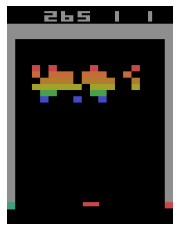

In [ ]:
 # save_frames_as_gif(frames, filename='result.gif')
save_frames_as_gif(frames2, filename='result.gif')

In [ ]:
!cp result.gif drive/MyDrive/DQN/

**Your link: ```TODO ```** (https://drive.google.com/file/d/1JgGEDFfxKIMimaVjW4egX0--MWNM3nIr/view?usp=sharing)

---

# Give Us Feedback

In [ ]:
from ipywidgets import Label, IntSlider, Textarea, Button, Layout, HBox, VBox
from IPython.display import clear_output

IntSlider_list = {i:IntSlider(value=3, min=1, max=5) for i in range(6)}
H1 = HBox([Label("How was the homework?")])
H2 = HBox([Label("Please rate the homework from 1 to 5 (lowest to highest).")])
H3 = HBox([Label("The assignment was instructive.", layout=Layout(width="22%")), IntSlider_list[0]])
H4 = HBox([Label("It was not time consuming.", layout=Layout(width="22%")), IntSlider_list[1]])
H5 = HBox([Label("The questions were clear.", layout=Layout(width="22%")), IntSlider_list[2]])
H6 = HBox([Label("The environment was interesting.", layout=Layout(width="22%")), IntSlider_list[3]])
H7 = HBox([Label("The homework was well organized.", layout=Layout(width="22%")), IntSlider_list[4]])
H8 = HBox([Label("Finally, you had a good vibe!", layout=Layout(width="22%")), IntSlider_list[5]])
textarea = Textarea(value='', placeholder='Any comments or suggestions', description='', disabled=False)
button = Button(description='Submit', disabled=False, button_style='', tooltip='Click me', icon='paper-plane')
H9 = HBox([textarea])
H10 = HBox([button])

def ff(button):
    button.button_style = 'success'
    score = sum([IntSlider_list[i].value for i in IntSlider_list]) / 6
    x = round(score*4)/4
    y = int(x) * '🌕' + ((x-int(x))==0 and not x==5) * '🌑' + ((x-int(x))==0.25) * '🌘' + ((x-int(x))==0.5) * '🌗' + ((x-int(x))==0.75) * '🌖' + (4-int(x)) * '🌑'
    clear_output(wait=True)
    display(VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9, H10]))
    print("Thank you for your feedback! 😊")
    print(f"Score: {y}")
    print("\nFeedback:",*[IntSlider_list[i].value for i in IntSlider_list])
    print(textarea.value)

button.on_click(ff)

VBox([H1, H2, H3, H4, H5, H6, H7, H8, H9, H10])

Thank you for your feedback! 😊
Score: 🌕🌕🌕🌗🌑

Feedback: 4 2 4 4 4 3



In [2]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html drive/MyDrive/Colab\ Notebooks/RL/3/CHW3_MiladSamimifar.ipynb

[NbConvertApp] Converting notebook drive/MyDrive/Colab Notebooks/RL/3/CHW3_MiladSamimifar.ipynb to html
/usr/local/lib/python3.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 1204604 bytes to drive/MyDrive/Colab Notebooks/RL/3/CHW3_MiladSamimifar.html
